In [ ]:
!pip install tensorflow==2.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 33.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Tanm3UMHh7RE7dmbf27O")
project = rf.workspace("project-kafxn").project("dried-fish-z1owz")
version = project.version(4)
dataset = version.download("folder")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dried-Fish-4 in folder:: 100%|██████████| 8023/8023 [00:01<00:00, 4620.95it/s]


In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

class_names= ['Baim', 'Chanda', 'Chapila', 'Chela','Chepa','Kachki','Loitta','Tengra']

class_names_labels={class_name:i for i, class_name in enumerate(class_names)}

print(class_names_labels)

nb_classes=len(class_names)

IMAGE_SIZE=(200,200)

def load_data():
    direct='/content/Dried-Fish-4'
    category=['train','valid','test']

    output=[]

    for cat in category:
      path=os.path.join(direct,cat)
      print(path)

      images=[]
      labels=[]

      for folder in os.listdir(path):
        print("folder:",folder)
        label= class_names_labels[folder]

        #Iterating each image
        for fle in os.listdir(os.path.join(path,folder)):

          img_path=os.path.join(os.path.join(path,folder),fle)

          image=cv2.imread(img_path)
          image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
          image=cv2.resize(image,IMAGE_SIZE)

          images.append(image)
          labels.append(label)

      images=np.array(images,dtype='float32')
      labels=np.array(labels,dtype='int32')

      output.append((images,labels))
    #print(type(output[0]))
    return output

(train_images,train_lables), (valid_images,valid_lables), (test_images,test_lables) = load_data()

{'Baim': 0, 'Chanda': 1, 'Chapila': 2, 'Chela': 3, 'Chepa': 4, 'Kachki': 5, 'Loitta': 6, 'Tengra': 7}
/content/Dried-Fish-4/train
folder: Chela
folder: Chepa
folder: Loitta
folder: Kachki
folder: Baim
folder: Tengra
folder: Chapila
folder: Chanda
/content/Dried-Fish-4/valid
folder: Chela
folder: Chepa
folder: Loitta
folder: Kachki
folder: Baim
folder: Tengra
folder: Chapila
folder: Chanda
/content/Dried-Fish-4/test
folder: Chela
folder: Chepa
folder: Loitta
folder: Kachki
folder: Baim
folder: Tengra
folder: Chapila
folder: Chanda


`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 200, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 100, 100, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 100, 100, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 100, 100, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 100, 100, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 100, 100, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 100, 100, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 100, 100, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 100, 100, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 100, 100, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 100, 100, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 100, 100, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 101, 101, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 50, 50, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,268,232 (8.65 MB)

 Trainable params: 2,234,120 (8.52 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 95s 25ms/step - accuracy: 0.4679 - loss: 1.4469 - val_accuracy: 0.2338 - val_loss: 7.4018
Epoch 2/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 0.8113 - loss: 0.5500 - val_accuracy: 0.5714 - val_loss: 1.8700
Epoch 3/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8827 - loss: 0.3556 - val_accuracy: 0.4416 - val_loss: 2.5794
Epoch 4/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9355 - loss: 0.1999 - val_accuracy: 0.8896 - val_loss: 0.4973
Epoch 5/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9337 - loss: 0.1978 - val_accuracy: 0.7890 - val_loss: 0.6382
Epoch 6/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9528 - loss: 0.1436 - val_accuracy: 0.4513 - val_loss: 4.8101
Epoch 7/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9569 - loss: 0.1354 - val_accuracy: 0.9481 - val_loss: 0.1800
Epoch 8/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 

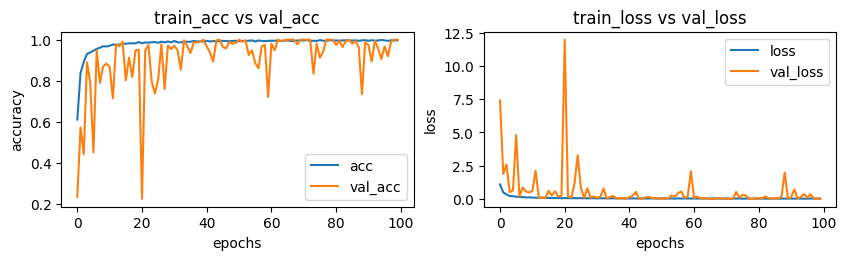

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


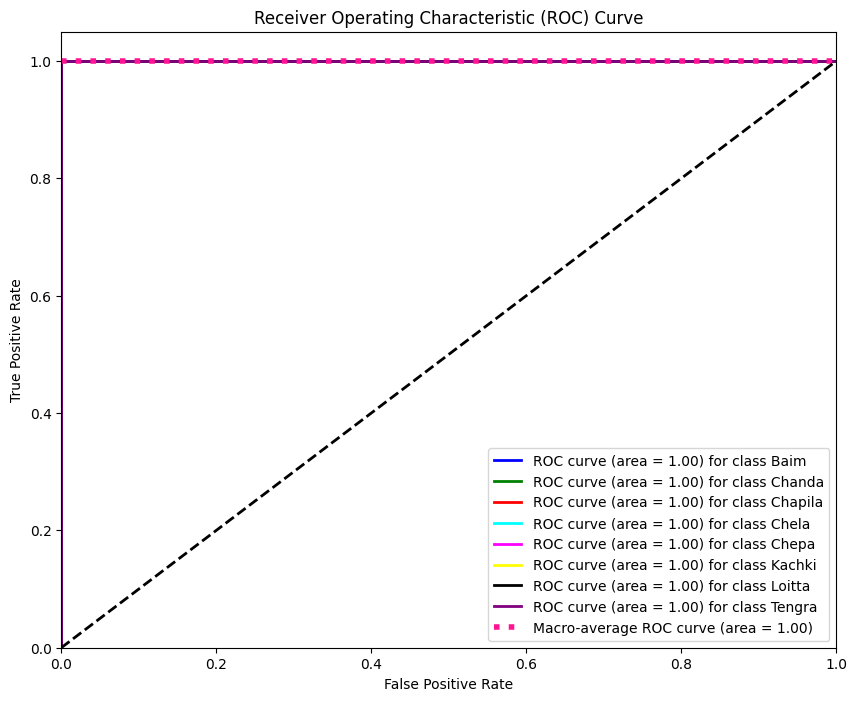

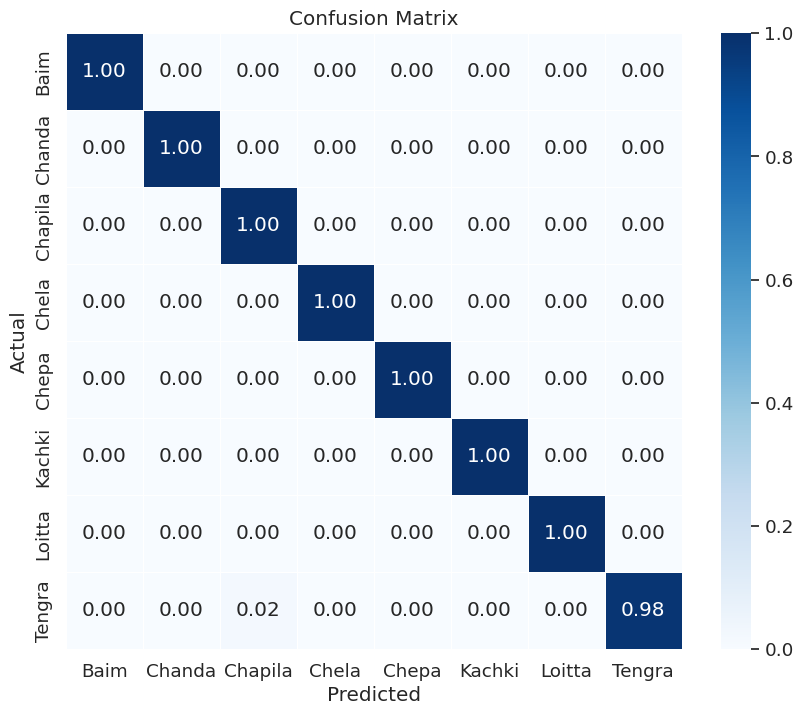

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D,GlobalAveragePooling2D, concatenate, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(200, 200, 3))

base_model = MobileNetV2(input_tensor=input_tensor, weights='imagenet',
                    include_top=False )

x = base_model.output
x=GlobalAveragePooling2D()(x)
x= Dense(8, activation='softmax')(x)

model= Model(inputs=input_tensor, outputs=x)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
for layer in model.layers:
   layer.trainable = True
model.summary()

model_checkpoint_callback = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=60,restore_best_weights=True)

history = model.fit(train_images, train_lables, batch_size=4, epochs=500,

        validation_data=(valid_images, valid_lables), callbacks=[model_checkpoint_callback])
#callbacks = [EarlyStopping(monitor='loss', patience=5)]

test_loss=model.evaluate(test_images,test_lables)
predictions=model.predict(test_images)
pred_lables=np.argmax(predictions,axis=1)
print(classification_report(test_lables,pred_lables))

def plot_accuracy_loss(history):
  fig=plt.figure(figsize=(10,5))

  #plot accuarcy
  plt.subplot(221)
  plt.plot(history.history['accuracy'],label='acc')
  plt.plot(history.history['val_accuracy'],label='val_acc')
  plt.title('train_acc vs val_acc')
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()


  #plot loss
  plt.subplot(222)
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.title('train_loss vs val_loss')
  plt.ylabel("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.show()

plot_accuracy_loss(history)

########################################### Subha ####################

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import load_model

# Assuming you have test data, labels, and predictions
# test_data = ...
# test_labels = ...
# test_predictions = ...

# Number of classes
num_classes = 8

# Map class names to their corresponding numbers
class_mapping = {
'Baim': 0, 'Chanda': 1, 'Chapila': 2, 'Chela': 3, 'Chepa': 4, 'Kachki': 5, 'Loitta': 6, 'Tengra':7
}

# Reverse the mapping to get class names from numbers
class_names = {v: k for k, v in class_mapping.items()}

# Binarize the labels
y_test = label_binarize(test_lables, classes=range(num_classes))

# Load your Keras model
# model = load_model('your_model_path')

# Predict probabilities
y_score = model.predict(test_images)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Interpolate ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot individual ROC curves
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], class_names[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=4, label='Macro-average ROC curve (area = {:.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

########################################### Subha ####################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(len(class_names) + 2, len(class_names)))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", linewidths=.5, square=True,
                xticklabels=class_names, yticklabels=class_names)

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')

    plt.show()

# Example usage:
# Replace y_true and y_pred with your actual and predicted labels
# Replace class_names with your class names
y_true = test_lables  # Replace with your actual labels
y_pred = pred_lables  # Replace with your predicted labels
class_names= class_names= ['Baim', 'Chanda', 'Chapila', 'Chela','Chepa','Kachki','Loitta','Tengra']

plot_confusion_matrix(y_true, y_pred, class_names)



In [ ]:
"""import keras
model.save_weights('/content/banana_custom.h5', overwrite=True)"""

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 26, 26, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                        

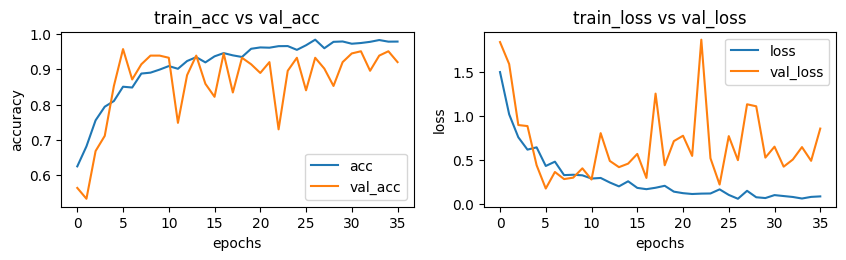

In [ ]:
"""########################################### ####################

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate,Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Initializing the CNN
model = Sequential()

model.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                      padding= 'valid', activation= 'relu',
                      input_shape= (200,200,3),
                      kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                      padding= 'valid', data_format= None))
model.add(BatchNormalization())


model.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                padding= 'same', activation= 'relu',
                kernel_initializer= 'he_normal'))
model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                      padding= 'valid', data_format= None))
model.add(BatchNormalization())


model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                padding= 'same', activation= 'relu',
                kernel_initializer= 'he_normal'))
model.add(BatchNormalization())


model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                padding= 'same', activation= 'relu',
                kernel_initializer= 'he_normal'))
model.add(BatchNormalization())


model.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                padding= 'same', activation= 'relu',
                kernel_initializer= 'he_normal'))

model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                      padding= 'valid', data_format= None))
model.add(BatchNormalization())



# Flattening Step
model.add(Flatten())

# Full Connection Step
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax'))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_checkpoint_callback = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=50,restore_best_weights=True)

history = model.fit(train_images, train_lables, batch_size=4, epochs=5000,

        validation_data=(valid_images, valid_lables), callbacks=[model_checkpoint_callback])


test_loss=model.evaluate(test_images,test_lables)
predictions=model.predict(test_images)
pred_lables=np.argmax(predictions,axis=1)
print(classification_report(test_lables,pred_lables))

def plot_accuracy_loss(history):
  fig=plt.figure(figsize=(10,5))

  #plot accuarcy
  plt.subplot(221)
  plt.plot(history.history['accuracy'],label='acc')
  plt.plot(history.history['val_accuracy'],label='val_acc')
  plt.title('train_acc vs val_acc')
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()


  #plot loss
  plt.subplot(222)
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.title('train_loss vs val_loss')
  plt.ylabel("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.show()

plot_accuracy_loss(history)

##########################################################################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import roc_auc_score

# Assuming you have test data, labels, and predictions
# test_data = ...
# test_labels = ...
# test_predictions = ...

# Number of classes
num_classes = 4

# Map class names to their corresponding numbers
class_mapping = {
'Bangla Kola': 0, 'Champa Kola': 1, 'Sabri Kola': 2, 'Sagor Kola': 3
}

# Reverse the mapping to get class names from numbers
class_names = {v: k for k, v in class_mapping.items()}

# Binarize the labels
y_test = label_binarize(test_lables, classes=range(num_classes))

# Load your Keras model
# model = load_model('your_model_path')

# Predict probabilities
y_score = model.predict(test_images)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Interpolate ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot individual ROC curves
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], class_names[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=4, label='Macro-average ROC curve (area = {:.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
########################################################################################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(len(class_names) + 2, len(class_names)))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", linewidths=.5, square=True,
                xticklabels=class_names, yticklabels=class_names)

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')

    plt.show()

# Example usage:
# Replace y_true and y_pred with your actual and predicted labels
# Replace class_names with your class names
y_true = test_lables  # Replace with your actual labels
y_pred = pred_lables  # Replace with your predicted labels
class_names= class_names= ['Bangla Kola', 'Champa Kola', 'Sabri Kola', 'Sagor Kola']

plot_confusion_matrix(y_true, y_pred, class_names)"""

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 200, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 99, 99, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 99, 99, 32)     │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 99, 99, 32)     │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 97, 97, 64)     │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 97, 97, 64)     │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 97, 97, 64)     │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 97, 97, 128)    │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 97, 97, 128)    │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 97, 97, 128)    │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 97, 97, 128)    │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 97, 97, 128)    │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 49, 49, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 49, 49, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 20,877,872 (79.64 MB)

 Trainable params: 20,823,344 (79.43 MB)

 Non-trainable params: 54,528 (213.00 KB)

Epoch 1/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 160s 63ms/step - accuracy: 0.3720 - loss: 1.6502 - val_accuracy: 0.7825 - val_loss: 0.6837
Epoch 2/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 114s 61ms/step - accuracy: 0.7456 - loss: 0.7379 - val_accuracy: 0.8312 - val_loss: 0.4979
Epoch 3/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - accuracy: 0.8594 - loss: 0.4101 - val_accuracy: 0.9870 - val_loss: 0.0346
Epoch 4/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - accuracy: 0.9175 - loss: 0.2482 - val_accuracy: 0.8994 - val_loss: 0.3026
Epoch 5/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 142s 61ms/step - accuracy: 0.9423 - loss: 0.1812 - val_accuracy: 0.9578 - val_loss: 0.0965
Epoch 6/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 114s 62ms/step - accuracy: 0.9598 - loss: 0.1312 - val_accuracy: 0.9870 - val_loss: 0.0537
Epoch 7/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 113s 61ms/step - accuracy: 0.9650 - loss: 0.1152 - val_accuracy: 0.9903 - val_loss: 0.0311
Epoch 8/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - ac

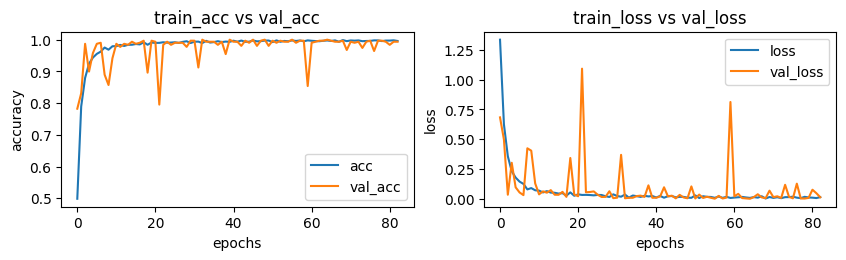

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


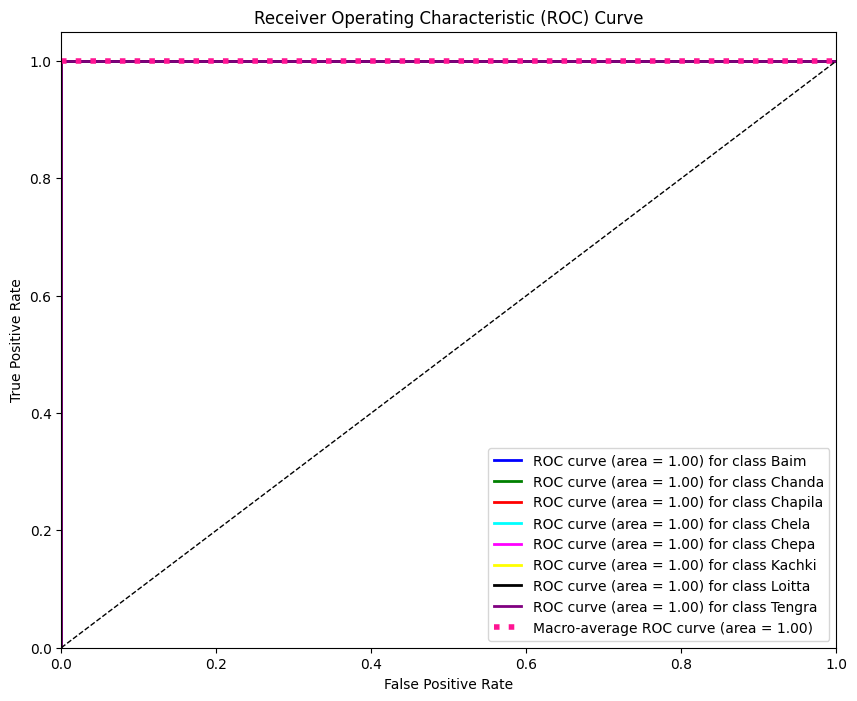

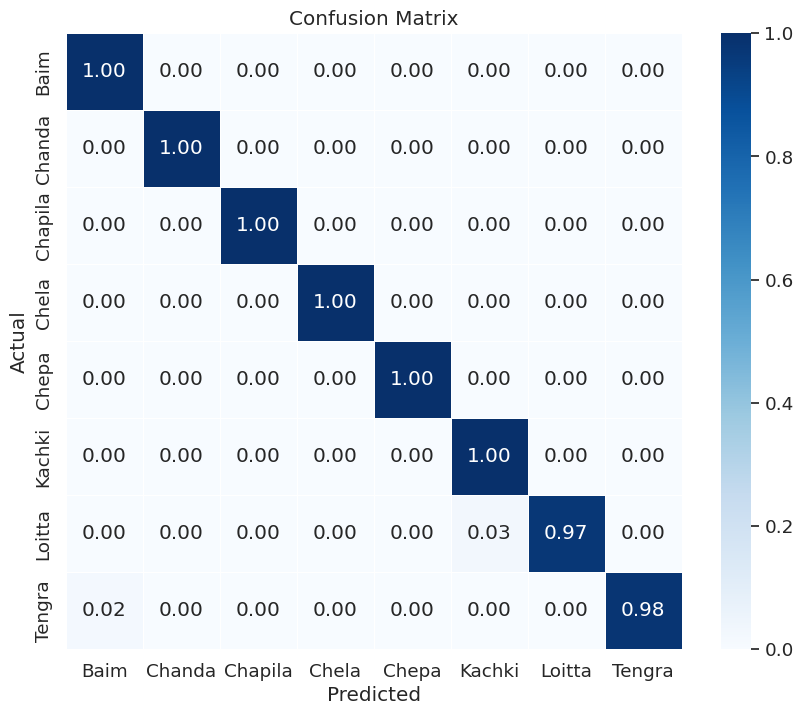

In [ ]:
########################################### Lamia ####################
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate,Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(200, 200, 3))

base_model = Xception(input_tensor=input_tensor, weights='imagenet',
                    include_top=False )

x = base_model.output
x=GlobalAveragePooling2D()(x)
x= Dense(8, activation='softmax')(x)

model= Model(inputs=input_tensor, outputs=x)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
for layer in model.layers:
   layer.trainable = True
model.summary()

model_checkpoint_callback = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=50,restore_best_weights=True)

history = model.fit(train_images, train_lables, batch_size=4, epochs=500,

        validation_data=(valid_images, valid_lables), callbacks=[model_checkpoint_callback])
#callbacks = [EarlyStopping(monitor='loss', patience=5)]

test_loss=model.evaluate(test_images,test_lables)
predictions=model.predict(test_images)
pred_lables=np.argmax(predictions,axis=1)
print(classification_report(test_lables,pred_lables))

def plot_accuracy_loss(history):
  fig=plt.figure(figsize=(10,5))

  #plot accuarcy
  plt.subplot(221)
  plt.plot(history.history['accuracy'],label='acc')
  plt.plot(history.history['val_accuracy'],label='val_acc')
  plt.title('train_acc vs val_acc')
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()


  #plot loss
  plt.subplot(222)
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.title('train_loss vs val_loss')
  plt.ylabel("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.show()

plot_accuracy_loss(history)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import roc_auc_score

# Assuming you have test data, labels, and predictions
# test_data = ...
# test_labels = ...
# test_predictions = ...

# Number of classes
num_classes = 8

# Map class names to their corresponding numbers
class_mapping = {
'Baim': 0, 'Chanda': 1, 'Chapila': 2, 'Chela': 3, 'Chepa': 4, 'Kachki': 5, 'Loitta': 6, 'Tengra':7
}


# Reverse the mapping to get class names from numbers
class_names = {v: k for k, v in class_mapping.items()}

# Binarize the labels
y_test = label_binarize(test_lables, classes=range(num_classes))

# Load your Keras model
# model = load_model('your_model_path')

# Predict probabilities
y_score = model.predict(test_images)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Interpolate ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot individual ROC curves
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], class_names[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=4, label='Macro-average ROC curve (area = {:.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(len(class_names) + 2, len(class_names)))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", linewidths=.5, square=True,
                xticklabels=class_names, yticklabels=class_names)

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')

    plt.show()

# Example usage:
# Replace y_true and y_pred with your actual and predicted labels
# Replace class_names with your class names
y_true = test_lables  # Replace with your actual labels
y_pred = pred_lables  # Replace with your predicted labels
class_names= class_names= ['Baim', 'Chanda', 'Chapila', 'Chela','Chepa','Kachki','Loitta','Tengra']

plot_confusion_matrix(y_true, y_pred, class_names)


In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate,Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(200, 200, 3))

base_model = ResNet50V2(input_tensor=input_tensor, weights='imagenet',
                    include_top=False )

x = base_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(8, activation='softmax')(x)

model= Model(inputs=input_tensor, outputs=x)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
for layer in model.layers:
   layer.trainable = True
model.summary()

model_checkpoint_callback = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=50,restore_best_weights=True)

history = model.fit(train_images, train_lables, batch_size=4, epochs=500,

        validation_data=(valid_images, valid_lables), callbacks=[model_checkpoint_callback])
#callbacks = [EarlyStopping(monitor='loss', patience=5)]

test_loss=model.evaluate(test_images,test_lables)
predictions=model.predict(test_images)
pred_lables=np.argmax(predictions,axis=1)
print(classification_report(test_lables,pred_lables))

def plot_accuracy_loss(history):
  fig=plt.figure(figsize=(10,5))

  #plot accuarcy
  plt.subplot(221)
  plt.plot(history.history['accuracy'],label='acc')
  plt.plot(history.history['val_accuracy'],label='val_acc')
  plt.title('train_acc vs val_acc')
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()


  #plot loss
  plt.subplot(222)
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.title('train_loss vs val_loss')
  plt.ylabel("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.show()

plot_accuracy_loss(history)

################################################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import roc_auc_score

# Assuming you have test data, labels, and predictions
# test_data = ...
# test_labels = ...
# test_predictions = ...

# Number of classes
num_classes = 8

# Map class names to their corresponding numbers
class_mapping = {
'Baim': 0, 'Chanda': 1, 'Chapila': 2, 'Chela': 3, 'Chepa': 4, 'Kachki': 5, 'Loitta': 6, 'Tengra':7
}


# Reverse the mapping to get class names from numbers
class_names = {v: k for k, v in class_mapping.items()}

# Binarize the labels
y_test = label_binarize(test_lables, classes=range(num_classes))

# Load your Keras model
# model = load_model('your_model_path')

# Predict probabilities
y_score = model.predict(test_images)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Interpolate ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot individual ROC curves
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], class_names[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=4, label='Macro-average ROC curve (area = {:.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
########################################################################################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(len(class_names) + 2, len(class_names)))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", linewidths=.5, square=True,
                xticklabels=class_names, yticklabels=class_names)

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')

    plt.show()

# Example usage:
# Replace y_true and y_pred with your actual and predicted labels
# Replace class_names with your class names
y_true = test_lables  # Replace with your actual labels
y_pred = pred_lables  # Replace with your predicted labels
class_names= class_names= ['Baim', 'Chanda', 'Chapila', 'Chela','Chepa','Kachki','Loitta','Tengra']

plot_confusion_matrix(y_true, y_pred, class_names)


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 200, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 206, 206, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 100, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 102, 102, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 50, 50, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 50, 50, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 50, 50, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 50, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 52, 52, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 50, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 50, 50, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 23,581,192 (89.96 MB)

 Trainable params: 23,535,752 (89.78 MB)

 Non-trainable params: 45,440 (177.50 KB)

NameError: name 'train_images' is not defined

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 200, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 200, 200, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 200, 200, 3)    │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 100, 100, 32)   │            864 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 100, 100, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 100, 100, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 100, 100, 16)   │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 100, 100, 16)   │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 100, 100, 16)   │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, 50, 50, 64)     │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, 50, 50, 64)     │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, 50, 50, 64)     │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, 50, 50, 32)     │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, 50, 50, 32)     │            128 │ block2a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 5,929,560 (22.62 MB)

 Trainable params: 5,868,952 (22.39 MB)

 Non-trainable params: 60,608 (236.75 KB)

Epoch 1/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 147s 35ms/step - accuracy: 0.6704 - loss: 0.9330 - val_accuracy: 0.9805 - val_loss: 0.0663
Epoch 2/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.9260 - loss: 0.2282 - val_accuracy: 0.9870 - val_loss: 0.0368
Epoch 3/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9454 - loss: 0.1656 - val_accuracy: 0.9870 - val_loss: 0.0452
Epoch 4/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9461 - loss: 0.1617 - val_accuracy: 0.9870 - val_loss: 0.0304
Epoch 5/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 51s 28ms/step - accuracy: 0.9645 - loss: 0.1073 - val_accuracy: 0.9870 - val_loss: 0.0299
Epoch 6/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9745 - loss: 0.0794 - val_accuracy: 0.9838 - val_loss: 0.0539
Epoch 7/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 51s 28ms/step - accuracy: 0.9737 - loss: 0.0850 - val_accuracy: 0.9870 - val_loss: 0.0274
Epoch 8/500
1845/1845 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy:

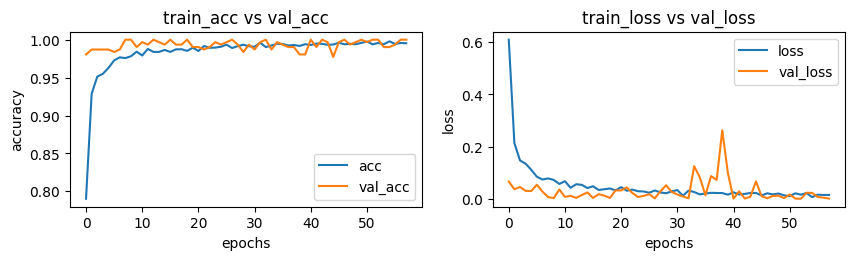

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


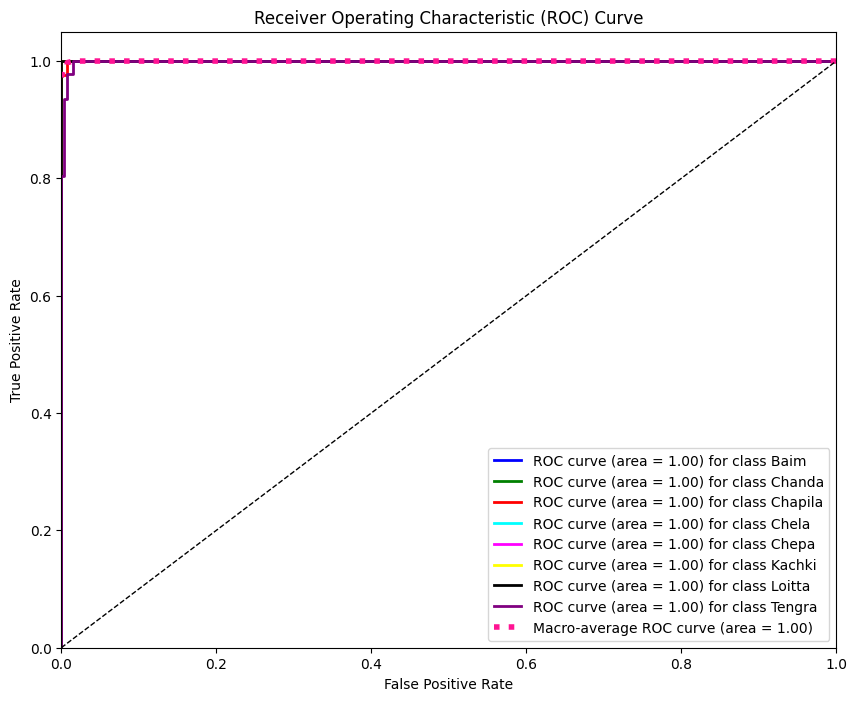

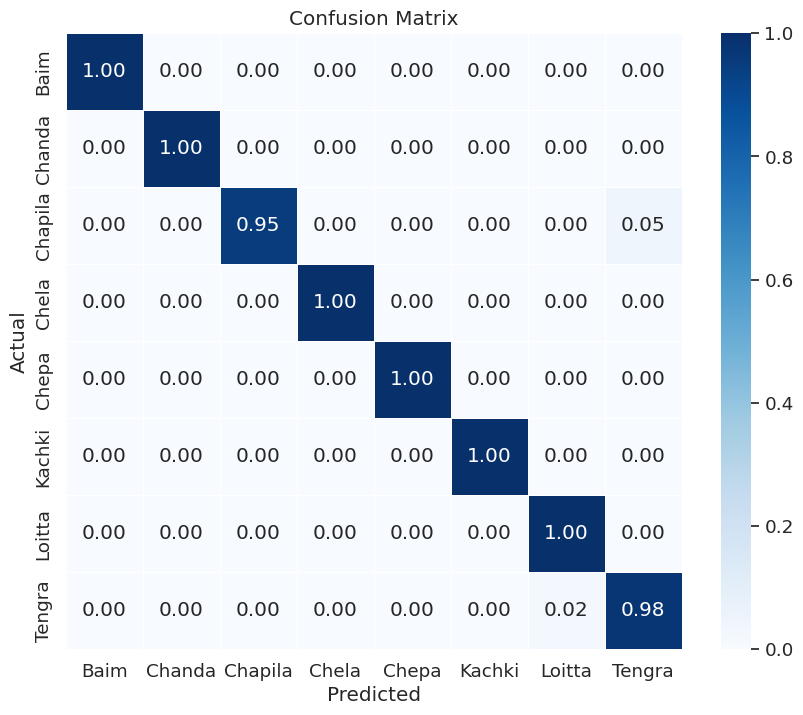

In [ ]:
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate,Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(200, 200, 3))

base_model = EfficientNetV2B0(input_tensor=input_tensor, weights='imagenet',
                    include_top=False )

x = base_model.output
x=GlobalAveragePooling2D()(x)
x= Flatten()(x)
x= Dense(8, activation='softmax')(x)

model= Model(inputs=input_tensor, outputs=x)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
for layer in model.layers:
   layer.trainable = True
model.summary()

model_checkpoint_callback = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=50,restore_best_weights=True)

history = model.fit(train_images, train_lables, batch_size=4, epochs=500,

        validation_data=(valid_images, valid_lables), callbacks=[model_checkpoint_callback])
#callbacks = [EarlyStopping(monitor='loss', patience=5)]

test_loss=model.evaluate(test_images,test_lables)
predictions=model.predict(test_images)
pred_lables=np.argmax(predictions,axis=1)
print(classification_report(test_lables,pred_lables))

def plot_accuracy_loss(history):
  fig=plt.figure(figsize=(10,5))

  #plot accuarcy
  plt.subplot(221)
  plt.plot(history.history['accuracy'],label='acc')
  plt.plot(history.history['val_accuracy'],label='val_acc')
  plt.title('train_acc vs val_acc')
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()


  #plot loss
  plt.subplot(222)
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.title('train_loss vs val_loss')
  plt.ylabel("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.show()

plot_accuracy_loss(history)

################################################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import roc_auc_score

# Assuming you have test data, labels, and predictions
# test_data = ...
# test_labels = ...
# test_predictions = ...

# Number of classes
num_classes = 8

# Map class names to their corresponding numbers
class_mapping = {
'Baim': 0, 'Chanda': 1, 'Chapila': 2, 'Chela': 3, 'Chepa': 4, 'Kachki': 5, 'Loitta': 6, 'Tengra':7
}

# Reverse the mapping to get class names from numbers
class_names = {v: k for k, v in class_mapping.items()}

# Binarize the labels
y_test = label_binarize(test_lables, classes=range(num_classes))

# Load your Keras model
# model = load_model('your_model_path')

# Predict probabilities
y_score = model.predict(test_images)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Interpolate ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Plot individual ROC curves
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], class_names[i]))

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='deeppink', linestyle=':', linewidth=4, label='Macro-average ROC curve (area = {:.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
########################################################################################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

    plt.figure(figsize=(len(class_names) + 2, len(class_names)))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", linewidths=.5, square=True,
                xticklabels=class_names, yticklabels=class_names)

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')

    plt.show()

# Example usage:
# Replace y_true and y_pred with your actual and predicted labels
# Replace class_names with your class names
y_true = test_lables  # Replace with your actual labels
y_pred = pred_lables  # Replace with your predicted labels
class_names= class_names= ['Baim', 'Chanda', 'Chapila', 'Chela','Chepa','Kachki','Loitta','Tengra']

plot_confusion_matrix(y_true, y_pred, class_names)
